# Genetic Algorithm

Travelling salesman problem as you probably know at this point is about generating a good permutation of all the vertices in the graph. Assuming that the graph is fully connected, which makes every permutation of the vertices feasible solution for the problem, remember that we didn't have this luxury in our problem of finding the shortest path and we needed to jump through hoops to generate possible solution and doing crossover and mutations. 
 

This class of permutation problems, where every permutation is feasible solution, is very common and the methods of crossover and mutation in this class don't depend on the given problem as you would see in this notebook. Having these generic methods of mutation and crossover in repertoire is essential.  

---

Our GA model would be generational, and our fitness function would be the length of the complete tour. We are interested in this notebook to discusss the crossover and mutation operators and see their differences in terms of solution convergence speed.

---

The following operators would work on any GA permutation problem where any possible permutation is feasible solution.

## Crossover Operators

1. Adjacency-based operators
    1. Partially Mapped Crossover
    2. Edge Crossover
    
2. Order-based operators
    1. Order 1 Crossover
    2. Cycle Crossover
    


## Mutation Operators

1. Insert Mutation
2. Swap Mutation
3. Inversion Mutation
4. Scramble Mutation

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from utilities import *

Let's generate a random complete graph so any permutation of its vertices is feasible solution.

In [2]:
G = nx.complete_graph(25)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)

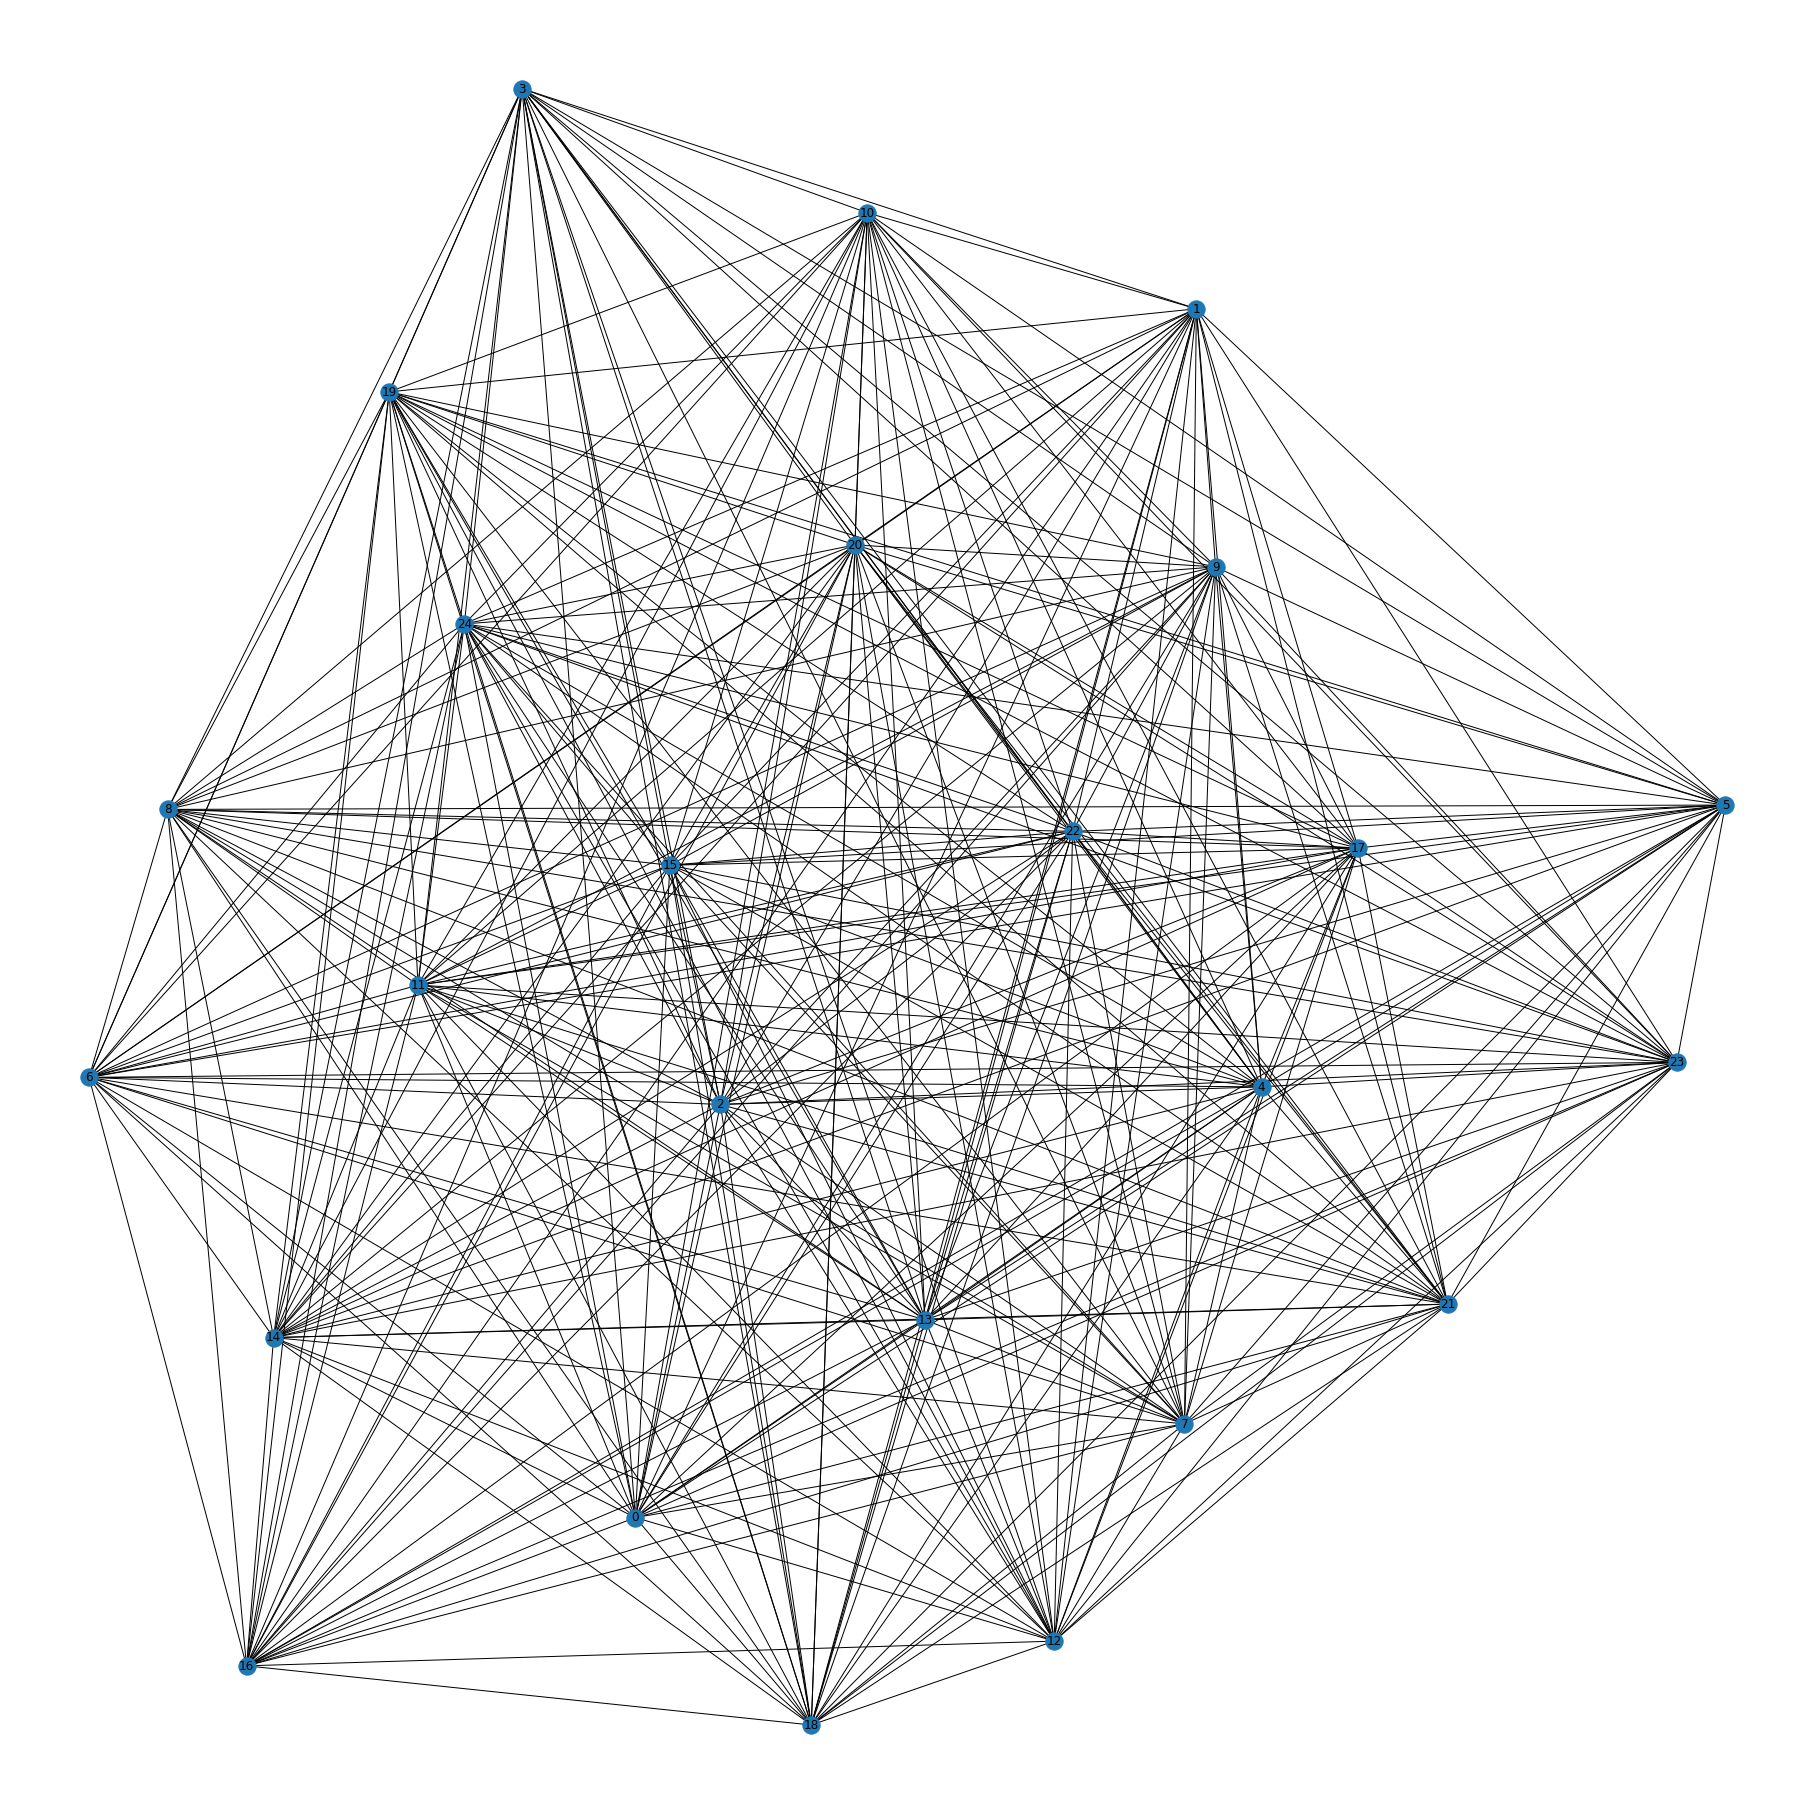

In [3]:
plt.figure(figsize=(25,25)) 
nx.draw(G, with_labels=True)
plt.show()

The following method generate specified number of random tours in the graph.

In [4]:
%%capture
source(random_tour)

## Crossover Operators

Okay, we have two permutations and we want them to crossover to generate another permutation. We can't do that cut-and-paste style or randomly substitute elements from one permutation to another because that either solutions probably wouldn't generate an actual and admissible permutation.  

That is why we present the following algorithms that do crossover for permutations and generate admissible solutions.

### Partially Mapped Crossover

This algorithm is very lightweight and disrupt a lot of the "genes" in your permutation which is desirable in GA.

We will implement it step by step with the comments in the code.

In [5]:
source(PMX_crossover)

### Edge Recombination Crossover

The offspring of doing crossover by this method depends on the edges and connection between the nodes in each permutation. 

In [7]:
source(ERO_crossover)

In [ ]:
def insert_mutation(member):
    member = list(member)    # to deal with list-hashing issue in Python
    length = len(member)
    first_gene = random.randint(0, length - 1)
    second_gene = random.randint(0, length - 1)
    member[first_gene], member[second_gene] = member[second_gene], member[first_gene]
    return tuple(member)

In [ ]:
num_of_population = 20

In [ ]:
population = [(member, getWeight(G, member)) for member in [*random_permutation(list(G.nodes()),number_of_perms = num_of_population)]]

In [ ]:
ngen = 5000

In [ ]:
from problem import probability

mutate_probability = 0.6
crossover_probability = 0.7

In [ ]:
for generation in range(ngen):
    # 1- we have a sorted pool of 50 random paths with respect to their length
    # 2- mutate a random even number of best paths in population
    # 3- crossover them (PMX)
    # 4- insert half that even number into the pool to keep the population to be 50 members
    # 5- after `ngen` return the best path
    
    # 1-
    sorted(population, key = lambda member : member[1])
    numOfmembers = random_even_number(num_of_population)
    members = population[:numOfmembers]
    
    # 2-
    for i in range(numOfmembers):
        if probability(mutate_probability):
            mutated_path = insert_mutation(members[i][0])
            members[i] = (mutated_path, getWeight(G, mutated_path))
    
    # so if we will do cross-over for some member
    # it would be with that member and the next best thing
    sorted(members, key = lambda member : member[1])
    
    # 3-
    for j in range(numOfmembers - 1):
        if probability(crossover_probability):
            crossed_over = PMX_crossover(members[j][0], members[j+1][0])
            members[j] = (crossed_over, getWeight(G, tuple(crossed_over)))
    
    population[:numOfmembers] = members
    

In [ ]:
route, cost = min(population, key = lambda member : member[1])

In [ ]:
route

In [ ]:
cost